In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors
import pylab 
import scipy.stats as stats

In [56]:
#aqua = pd.read_csv('data/AZGroundWater_20year.csv')
#aqua['PercentChange'] = 100*aqua['WL CHANGE']/aqua['WL 1998']
#aqua['ChangeRate'] = aqua['WL CHANGE']/20

aqua_count = len(aqua)

twenty_yr_chg = aqua['WL CHANGE']

aqua_total_change = aqua['WL CHANGE'].sum()

aqua_diminishing = aqua[aqua['PercentChange']<0].sort_values(by=['PercentChange'])
aqua_rising = aqua[aqua['PercentChange']>0]

Perc_chg = [x for x in aqua.PercentChange if np.isnan(x) == False]
level_chg = [z for z in aqua['WL CHANGE'] if np.isnan(z)==False]

#we need an accumulator for slices of 10 feet of depth change, 
water_bands = []
y = []
water_bands_total = 0
for f in range(-180,220,40):
    #get count for band
    band_count = len(aqua[aqua['WL CHANGE']< f + 40]) - len(aqua[aqua['WL CHANGE']< f])
    print(f)
    water_bands.append(band_count)
    y.append(f)
    
#print(water_bands,y)


#plt.bar(y,water_bands)
#plt.show()   

#print(len(y_axis), len(water_bands))


#print(aqua_count, len(aqua_diminishing), len(aqua_rising))
#print(aqua_total_change, aqua_diminishing['WL CHANGE'].min())
#aqua.head()

#fig, ax = plt.subplots(figsize=(10,10))
#ax.boxplot(aqua_rising['WL CHANGE'])

#ax.plot()


-180
-140
-100
-60
-20
20
60
100
140
180


3.027317269076306 44.306879457195635


Text(0.5, 1.0, 'Twenty Year Well Depth Change')

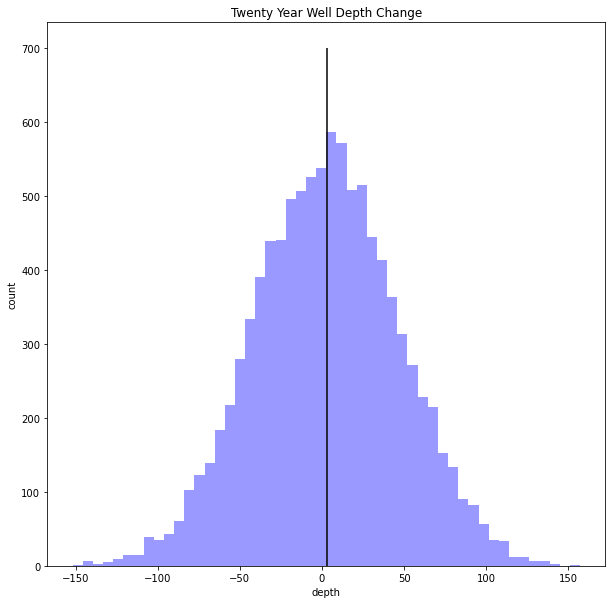

In [40]:
from scipy.stats import norm
#let's get the mean and std deviation from the aquifier dataset and plot 100 points
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11
rand = np.random.RandomState(seed)    

mean20 = aqua['WL CHANGE'].mean()
std20 = aqua['WL CHANGE'].std()

print(mean20,std20)
data_norm = norm.rvs(size=10000, loc=mean20, scale=std20)
y = norm.pdf(data_norm,0,1)
    
fig, ax = plt.subplots(figsize=(10,10))    
    
ax.hist(data_norm,bins=50,color='blue', alpha=0.4)
ax.vlines(mean20,0,700,colors='k')
ax.set_xlabel('depth')
#ax.set_xlim(-10,60)
#ax.set_ylim(0,700)
ax.set_ylabel('count')
ax.set_title('Twenty Year Well Depth Change')


In [13]:
#compare ten year numbers with twenty year numbers
#aqua10 = pd.read_csv('data/Groundwater2008_2018.csv')
#add column to give us % change for each well
#aqua10['PercentChange'] = 100*aqua10['WL CHANGE']/aqua10['WL 2008']
#what is the change rate over ten years
#aqua10['ChangeRate'] = aqua10['WL CHANGE']/10

#how many wells
aqua10_count = len(aqua10)

#what is the total change in well level across the dataset
aqua10_total_change = aqua10['WL CHANGE'].sum()

#what happened to Phoenix AMA
phx = aqua10[aqua10['BASIN'] == 'PHOENIX AMA']
phx_water_gain = phx['WL CHANGE'].sum()
phx_water_gain_min = phx['WL CHANGE'].min()
phx_water_gain_max = phx['WL CHANGE'].max()
phx_well_count = len(phx)

print(phx_water_gain, phx_well_count, phx_water_gain_max, phx_water_gain_min)

#how many wells lost feet?
aqua10_diminishing = aqua10[aqua10['PercentChange']<0].sort_values(by=['PercentChange'])
#how many wells gained water?
aqua10_rising = aqua10[aqua10['PercentChange']>0]

Perc_chg_10 = [x for x in aqua.PercentChange if np.isnan(x) == False] #if we try to calculate without clean data we get an error
level_chg_10 = [z for z in aqua['WL CHANGE'] if np.isnan(z)==False]

print(aqua10_count, len(aqua10_diminishing), len(aqua10_rising))
print(aqua10_total_change)

1321.9 227 108.9 -96.9
1024 639 380
-2734.7


-2.670605468749999 21.3160439445813


Text(0.5, 1.0, 'Ten Year Well Depth Change')

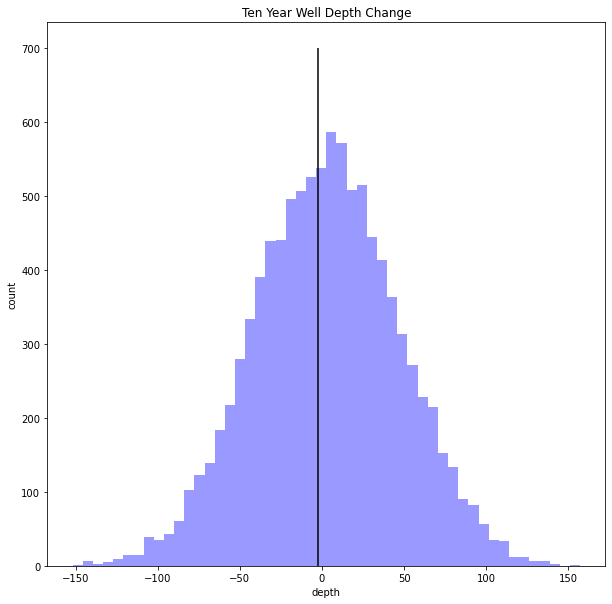

In [55]:
#let's get the mean and std deviation from the aquifier dataset and plot 100 points
# Define the seed so that results can be reproduced
seed = 11
rand_state = 11
rand = np.random.RandomState(seed)

ten_yr_chg = aqua10['WL CHANGE']

mean10 = aqua10['WL CHANGE'].mean()
std10 = aqua10['WL CHANGE'].std()

print(mean10,std10)
data_norm10 = norm.rvs(size=10000, loc=mean10, scale=std10)
y10 = norm.pdf(data_norm,0,1)
    
fig, ax = plt.subplots(figsize=(10,10))    
    
ax.hist(data_norm,bins=50,color='blue', alpha=0.4)
ax.vlines(mean10,0,700,colors='k')
ax.set_xlabel('depth')
#ax.set_xlim(-10,60)
#ax.set_ylim(0,700)
ax.set_ylabel('count')
ax.set_title('Ten Year Well Depth Change')

-2.670605468749999 21.3160439445813


Text(0.5, 1.0, 'Ten Year Well Depth Change w/o Phoenix AMA')

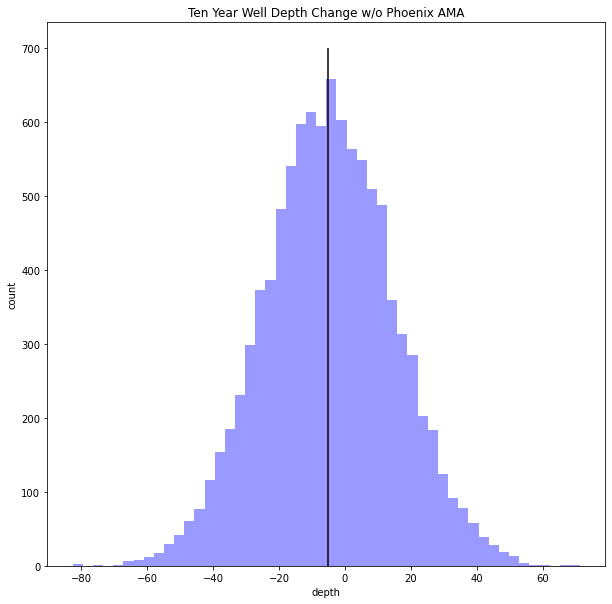

In [43]:
#what if we took the phoenix AMA out of the dataset
wo_phx = phx = aqua10[aqua10['BASIN'] != 'PHOENIX AMA']

mean_wo = wo_phx['WL CHANGE'].mean()
std_wo = wo_phx['WL CHANGE'].std()

print(mean10,std10)
data_wo = norm.rvs(size=10000, loc=mean_wo, scale=std_wo)
y_wo = norm.pdf(data_wo,0,1)
    
fig, ax = plt.subplots(figsize=(10,10))    
    
ax.hist(data_wo,bins=50,color='blue', alpha=0.4)
ax.vlines(mean_wo,0,700,colors='k')
ax.set_xlabel('depth')
#ax.set_xlim(-10,60)
#ax.set_ylim(0,700)
ax.set_ylabel('count')
ax.set_title('Ten Year Well Depth Change w/o Phoenix AMA')

-0.4008097165991901 6.410028052634575


Text(0.5, 1.0, 'Single Year Well Depth Change')

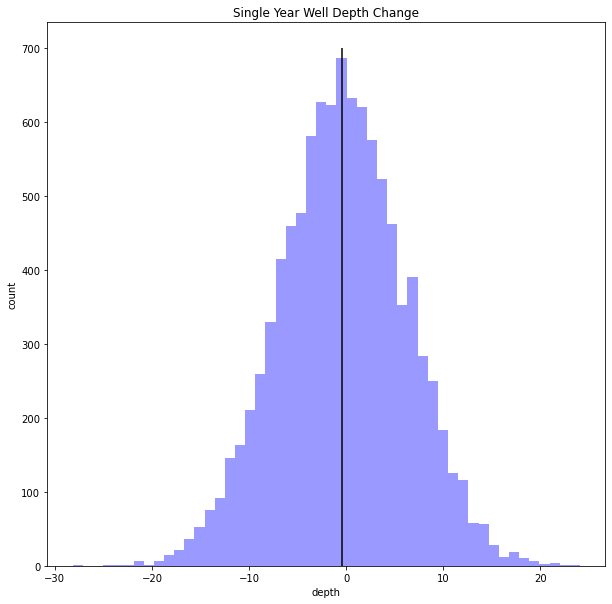

In [54]:
#one year well depth change
year = pd.read_csv('data/Groundwater2017_2018.csv')

one_yr_chg = [x for x in year['WL CHANGE'] if np.isnan(x) == False]

#print(one_yr_chg)

mu = year['WL CHANGE'].mean()
std1 = year['WL CHANGE'].std()

print(mu,std1)
data_norm1 = norm.rvs(size=10000, loc=mu, scale=std1)
y1 = norm.pdf(data_norm1,0,1)
    
fig, ax = plt.subplots(figsize=(10,10))    
    
ax.hist(data_norm1,bins=50,color='blue', alpha=0.4)
ax.vlines(mu,0,700,colors='k')
ax.set_xlabel('depth')
#ax.set_xlim(-10,60)
#ax.set_ylim(0,700)
ax.set_ylabel('count')
ax.set_title('Single Year Well Depth Change')


In [75]:
#are the 1, 10, 20 year water level differences statistically different
#one_yr_chg, ten_yr_chg, twenty_yr_chg
year_diminishing = len(year[year['WL CHANGE'] < 0])
year_ft_loss = year[year['WL CHANGE'] < 0]['WL CHANGE'].sum()
year_avg_loss = year_ft_loss / year_diminishing

print(year_diminishing,year_ft_loss,  year_avg_loss)
#716 -2231.7000000000003 -3.1168994413407827

year_rising = len(year[year['WL CHANGE'] > 0])
year_ft_gain = year[year['WL CHANGE'] > 0]['WL CHANGE'].sum()
year_avg_gain = year_ft_gain / year_rising

print(year_rising,year_ft_gain,year_avg_gain)
#490 1736.6999999999998 3.544285714285714

ten_diminishing = len(aqua10[aqua10['WL CHANGE'] < 0])
ten_ft_loss = aqua10[aqua10['WL CHANGE'] < 0]['WL CHANGE'].sum()
ten_avg_loss = ten_ft_loss / ten_diminishing

print(ten_diminishing, ten_ft_loss, ten_avg_loss)

ten_rising = len(aqua10[aqua10['WL CHANGE'] > 0])
ten_ft_gain = aqua10[aqua10['WL CHANGE'] > 0]['WL CHANGE'].sum()
ten_avg_gain = ten_ft_gain / ten_rising

print(year_diminishing,year_ft_loss,  year_avg_loss)

#t, p = stats.ttest_ind(twenty_yr_chg, one_yr_chg)

#print(t,p)



716 -2231.7000000000003 -3.1168994413407827
490 1736.6999999999998 3.544285714285714


In [63]:
#year, aqua, aqua10 aqua10[aqua10['BASIN'] != 'PHOENIX AMA']
year_wo = year[year['BASIN'] != 'PHOENIX AMA']
year_chg = year_wo['WL CHANGE']

aqua_wo = aqua[aqua['BASIN'] != 'PHOENIX AMA']
aqua_chg = aqua_wo['WL CHANGE']

aqua10_wo = aqua10[aqua10['BASIN'] != 'PHOENIX AMA']
aqua10_chg = aqua10['WL CHANGE']

#t, p = stats.ttest_ind(aqua10_chg, aqua_chg)

print(year_chg)


0      -0.8
1       4.1
2      -3.7
3       0.7
4       7.4
       ... 
1230   -0.7
1231   -0.6
1232   -2.0
1233   -1.6
1234    4.8
Name: WL CHANGE, Length: 969, dtype: float64


-0.4290513570094788 0.6679266185527133
0.46982090154970607 0.6385241541068489


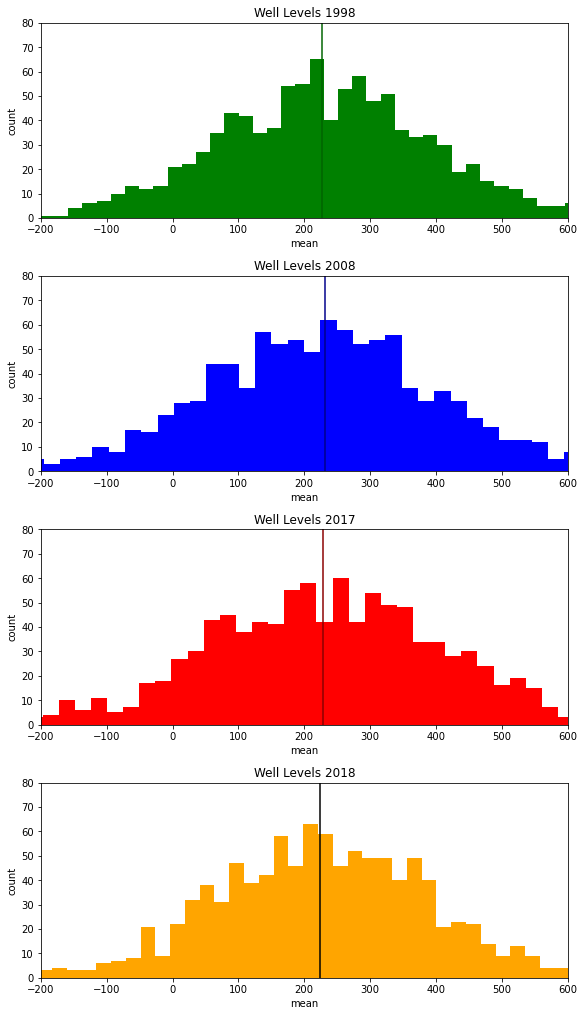

In [95]:
#get water levels for all years
_1998 = aqua['WL 1998']
_2008 = aqua10['WL 2008']
_2017 = year['WL 2017']
_2018 = aqua['WL 2018']

_1998_mean = aqua['WL 1998'].mean()
_2008_mean = aqua10['WL 2008'].mean()
_2017_mean = year['WL 2017'].mean()
_2018_mean = aqua['WL 2018'].mean()

_1998_std = aqua['WL 1998'].std()
_2008_std = aqua10['WL 2008'].std()
_2017_std = year['WL 2017'].std()
_2018_std = aqua['WL 2018'].std()

#print(_1998_mean,_2008_mean,_2017_mean,_2018_mean)

norm_1998 = norm.rvs(size=1000, loc=_1998_mean, scale=_1998_std)
y_1998 = norm.pdf(norm_1998,0,1)

norm_2017 = norm.rvs(size=1000, loc=_2017_mean, scale=_2017_std)
y_2017 = norm.pdf(norm_2017,0,1)

norm_2008 = norm.rvs(size=1000, loc=_2008_mean, scale=_2008_std)
y_2008 = norm.pdf(norm_2008,0,1)

norm_2018 = norm.rvs(size=1000, loc=_2018_mean, scale=_2018_std)
y_2018 = norm.pdf(norm_2018,0,1)

#plot the normal distributions

colors = ['green','blue','red','orange','yellow']
lines = ['darkgreen','darkblue','darkred','black']

fig, axs = plt.subplots(4,1, figsize=(8,14), constrained_layout=True)

axs[0].hist(norm_1998,bins=50,color=colors[0], alpha=1)
axs[0].vlines(_1998_mean,0,700,colors=lines[0])
axs[0].set_xlabel('mean')
axs[0].set_xlim(-200,600)
axs[0].set_ylim(0,80)
axs[0].set_ylabel('count')
axs[0].set_title('Well Levels 1998')

axs[1].hist(norm_2008,bins=50,color=colors[1], alpha=1)
axs[1].vlines(_2008_mean,0,700,colors=lines[1])
axs[1].set_xlabel('mean')
axs[1].set_xlim(-200,600)
axs[1].set_ylim(0,80)
axs[1].set_ylabel('count')
axs[1].set_title('Well Levels 2008')

axs[2].hist(norm_2017,bins=50,color=colors[2], alpha=1)
axs[2].vlines(_2017_mean,0,700,colors=lines[2])
axs[2].set_xlabel('mean')
axs[2].set_xlim(-200,600)
axs[2].set_ylim(0,80)
axs[2].set_ylabel('count')
axs[2].set_title('Well Levels 2017')

axs[3].hist(norm_2018,bins=50,color=colors[3], alpha=1)
axs[3].vlines(_2018_mean,0,700,colors=lines[3])
axs[3].set_xlabel('mean')
axs[3].set_xlim(-200,600)
axs[3].set_ylim(0,80)
axs[3].set_ylabel('count')
axs[3].set_title('Well Levels 2018')

t, p = stats.ttest_ind(_1998, _2008)
print(t,p)

t, p = stats.ttest_ind(_1998, _2018)
print(t,p)

t, p = stats.ttest_ind(_2017, _2018)
print(t,p)

#print(_1998[0:10])
#print(_2008[0:10])
#print(_2017[0:10])
#print(_2018[0:10])

#t, p = stats.ttest_ind(_1998, _2018)

#print(t,p)

In [96]:
t, p = stats.ttest_ind(_1998, _2008)
print(t,p)

t, p = stats.ttest_ind(_1998, _2018)
print(t,p)

t, p = stats.ttest_ind(_2017, _2018)
print(t,p)


-0.4290513570094788 0.6679266185527133
0.46982090154970607 0.6385241541068489
0.4613418859371808 0.644593829544837
